🔍 Validation Metrics:
              precision    recall  f1-score   support

           5       0.74      0.91      0.81        55
           6       0.80      0.71      0.75        69
           7       0.80      0.69      0.74        71
           8       0.69      0.75      0.72        60

    accuracy                           0.76       255
   macro avg       0.76      0.76      0.76       255
weighted avg       0.76      0.76      0.76       255

✅ Validation Accuracy: 0.7568627450980392

📊 Test Metrics:
              precision    recall  f1-score   support

           5       0.81      0.87      0.84        77
           6       0.69      0.75      0.72        75
           7       0.74      0.63      0.68        79
           8       0.74      0.73      0.73        88

    accuracy                           0.74       319
   macro avg       0.74      0.74      0.74       319
weighted avg       0.74      0.74      0.74       319

✅ Test Accuracy: 0.7429467084639498


/Users/lipisinghal/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


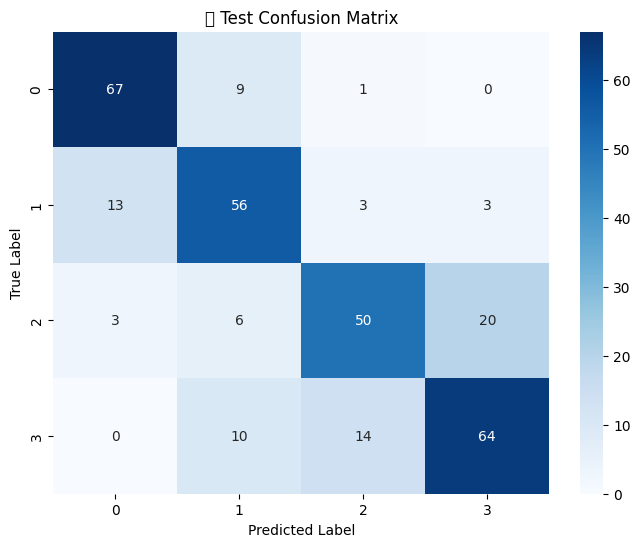

In [10]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Main paths
main_dir = "Split_Data"
data = []
labels = []

# Load image data and labels
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                # Extract pH value from filename
                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

# Convert to arrays
X = np.array(data)
y = np.array(labels)

# Train/validation/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Validation evaluation
val_preds = clf.predict(X_val)
print("🔍 Validation Metrics:")
print(classification_report(y_val, val_preds))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Test evaluation
test_preds = clf.predict(X_test)
print("\n📊 Test Metrics:")
print(classification_report(y_test, test_preds))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("🧪 Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
